In [30]:
# %%
import pandas as pd
import weasyprint
import webbrowser
import datetime
import os
import yfinance as yf
import math
import matplotlib.pyplot as plt


def highlight_values(x):
   if x < 0:
      return 'color: red'
   else:
      return 'color: black'

def scan_for_csv_files(directory):
    """Scans a directory for CSV files and returns their paths.

    Args:
        directory: The directory to scan.

    Returns:
        A list of paths to CSV files found in the directory.
    """

    csv_files = []
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            csv_file_path = os.path.join(directory, file)
            csv_files.append(csv_file_path)
    return csv_files

files = scan_for_csv_files(os.getcwd())
count = 0

def getData(ticker, key):
    try:
        x = str(ticker)
        sym = ""
        if ((str(ticker))[-1:]) == ".":
            sym += str(ticker) + "L"
        else:
            sym += str(ticker) + ".L"
        stock = yf.Ticker(sym)
        stock= stock.info
    
        return stock[key]

    except:
        pass


def getSector(ticker):
    x = getData(ticker, 'sector')
    return x
def getDividendYield(ticker):
    x =getData(ticker, 'diver')
    return x




for csv in files:



    df = pd.read_csv(csv)
    pd.set_option('display.width', 300)




    df.columns = df.columns.str.strip('\ufeff')
    totals = df.tail(2)

    df.drop(df.tail(2).index,inplace=True)




    df["Gain/Loss %"] = df["Gain/Loss %"].str.rstrip("%").astype('float')

    df["Day Gain/Loss"] = df["Day Gain/Loss"].str.rstrip("£")
    sectors = {}
    # Iterating through the column using iteritems
    # for column_name, column_data in df.items():
    #     if column_name == 'Symbol':

    #         for value in column_data:
    #             if not pd.isna(value):
    #                 sector  = getSector(str(value))
                
    #                 if sector in sectors:
    #                     sectors[sector] +=1
    #                 else:
    #                     sectors[sector] = 1




    
    df['Sector'] = df['Symbol'].apply(getSector)



Financial Services
Consumer Defensive
Energy
Industrials
Industrials
Financial Services
Energy
Utilities
Basic Materials
Basic Materials
Healthcare
Consumer Defensive
Financial Services
Consumer Cyclical
Industrials
Basic Materials
Healthcare
Healthcare
Industrials
Industrials
Industrials
Industrials
Industrials
Consumer Cyclical
Energy
Consumer Cyclical
Financial Services
Financial Services
Consumer Cyclical
Energy
Financial Services
Healthcare
Industrials
Consumer Defensive
Technology
Industrials
Consumer Cyclical
Consumer Cyclical
Consumer Defensive
Consumer Cyclical
Consumer Cyclical
Communication Services
Consumer Defensive
Consumer Cyclical
Basic Materials


In [31]:
df

,Symbol,Name,Qty,Price,Day Gain/Loss,Day Gain/Loss %,Market Value £,Market Value,Book Cost,Gain/Loss,Gain/Loss %,Average Price,Sector
0,ABDN,abrdn,441.0,145.10p,£-18.96,-2.88%,£639.89,£639.89,£811.52,£-171.63,-21.15,184.02p,Financial Services
1,ABF,Associated British Foods,95.0,"2,490.00p",£7.60,0.32%,"£2,365.50","£2,365.50","£1,703.76",£661.74,38.84,"1,793.43p",Consumer Defensive
2,AURA,Aura Energy Ltd,1922.0,6.50p,£0.38,0.30%,£124.93,£124.93,£199.92,£-74.99,-37.51,10.40p,Energy
3,BAB,Babcock International Group,155.0,507.50p,£-6.20,-0.78%,£786.63,£786.63,£801.93,£-15.30,-1.91,517.37p,Industrials
4,BA.,BAE Systems,1001.0,"1,316.00p",£-85.09,-0.64%,"£13,173.16","£13,173.16","£9,537.75","£3,635.41",38.12,952.82p,Industrials
5,BARC,Barclays,274.0,224.05p,£-8.49,-1.36%,£613.90,£613.90,£599.57,£14.33,2.39,218.82p,Financial Services
6,BP.,BP,430.0,419.15p,£-47.18,-2.55%,"£1,802.35","£1,802.35","£2,084.46",£-282.11,-13.53,484.76p,Energy
7,CNA,Centrica,2315.0,126.25p,£-47.46,-1.60%,"£2,922.69","£2,922.69","£2,759.21",£163.48,5.92,119.19p,Utilities
8,CDL,Cloudbreak Discovery,8607.0,0.25p,£-3.36,-13.00%,£21.52,£21.52,£596.20,£-574.68,-96.39,6.93p,Basic Materials
9,NaN,CONSOLIDATED GWTH ORD NPV,67933.0,£0.00,NaN,NaN,£0.00,£0.00,£0.01,£-0.01,-100.00,£0.00,None


In [ ]:


    df["Gain/Loss %"] = df["Gain/Loss %"].astype(str) + "%"



    result = pd.concat([df,totals])
    result = result.fillna('')

    # result["Day Gain/Loss"] =  result["Day Gain/Loss"].style.applymap(highlight_values)





    HTML_TEMPLATE1 = '''
    <html>
    <head>
    <style>
    @page {
        size: landscape;
        margin: 0in 0in 0in 0in;

    }
    body{
        display:flex;
        flex-direction: row-reverse;
        margin:0;
    }
    div{
        position: relative;

        font-size: 7px;
        width: 10%;
        font-family:  	Courier New;
        padding-top: 10px;

        font-weight: bold;

    }
    table {
        margin-left: 0;
        margin-right: 0;
        margin-top:0;
        font-size:10px;
    }
    table, th, td {
        border: 0.2px solid black;
        border-collapse: collapse;
    }
    th, td {
        padding: 2px;
        text-align: left;
        font-family: Helvetica, Arial, sans-serif;

    }
    table tbody tr:hover {
        background-color: #dddddd;
    }
    table thead th {
        text-align: center;
    }
    .wide {
        width: 90%;
    }
    </style>
    </head>
    <body>
    '''

    HTML_TEMPLATE2 = '''
    </body>
    </html>
    '''


    def to_html_pretty(df, filename='out.html', title=''):
        
        ht = ''
        if title != '':
            ht += '<div> %s </div>\n' % title
        ht += df.to_html(classes='wide', escape=False, index=False)

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(HTML_TEMPLATE1 + ht + HTML_TEMPLATE2)

    # Pretty print the dataframe as an html table to a file
    intermediate_html = 'intermediate.html'

    x = datetime.datetime.now()
    title = 'Updated: ' + x.strftime('%b') + ' ' + x.strftime('%y')
    # to_html_pretty(result,intermediate_html, title )
    # if you do not want pretty printing, just use pandas:
    # df.to_html(intermediate_html)

    # Convert the html file to a pdf file using weasyprint

    out_pdf= os.path.basename(os.path.normpath(csv)).replace('.csv', '') + '.pdf'
    # weasyprint.HTML(intermediate_html).write_pdf(out_pdf)


    # webbrowser.open_new_tab("/tmp/intermediate.html")

    # weasyprint.HTML('/tmp/intermediate.html').write_pdf('out.pdf')
    # This is the table pretty printer used above:


{'address1': '25 Gresham Street',
 'city': 'London',
 'zip': 'EC2V 7HN',
 'country': 'United Kingdom',
 'phone': '44 20 7626 1500',
 'website': 'https://www.lloydsbankinggroup.com',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': 'Lloyds Banking Group plc, together with its subsidiaries, provides a range of banking and financial services in the United Kingdom and internationally. It operates in three segments: Retail; Commercial Banking; and Insurance, Pensions and Investments. The Retail segment offers a range of financial service products, including current accounts, savings, mortgages, motor finance, unsecured loans, leasing solutions, and credit cards to personal customers. The Commercial Banking segment provides lending, transactional banking, working capital management, risk management, and debt f

In [24]:
df

,Symbol,Name,Qty,Price,Day Gain/Loss,Day Gain/Loss %,Market Value £,Market Value,Book Cost,Gain/Loss,Gain/Loss %,Average Price,Sector
0,ABDN,abrdn,441.0,145.10p,£-18.96,-2.88%,£639.89,£639.89,£811.52,£-171.63,-21.15%,184.02p,None
1,ABF,Associated British Foods,95.0,"2,490.00p",£7.60,0.32%,"£2,365.50","£2,365.50","£1,703.76",£661.74,38.84%,"1,793.43p",None
2,AURA,Aura Energy Ltd,1922.0,6.50p,£0.38,0.30%,£124.93,£124.93,£199.92,£-74.99,-37.51%,10.40p,None
3,BAB,Babcock International Group,155.0,507.50p,£-6.20,-0.78%,£786.63,£786.63,£801.93,£-15.30,-1.91%,517.37p,None
4,BA.,BAE Systems,1001.0,"1,316.00p",£-85.09,-0.64%,"£13,173.16","£13,173.16","£9,537.75","£3,635.41",38.12%,952.82p,None
5,BARC,Barclays,274.0,224.05p,£-8.49,-1.36%,£613.90,£613.90,£599.57,£14.33,2.39%,218.82p,None
6,BP.,BP,430.0,419.15p,£-47.18,-2.55%,"£1,802.35","£1,802.35","£2,084.46",£-282.11,-13.53%,484.76p,None
7,CNA,Centrica,2315.0,126.25p,£-47.46,-1.60%,"£2,922.69","£2,922.69","£2,759.21",£163.48,5.92%,119.19p,None
8,CDL,Cloudbreak Discovery,8607.0,0.25p,£-3.36,-13.00%,£21.52,£21.52,£596.20,£-574.68,-96.39%,6.93p,None
9,NaN,CONSOLIDATED GWTH ORD NPV,67933.0,£0.00,NaN,NaN,£0.00,£0.00,£0.01,£-0.01,-100.0%,£0.00,None


<Axes: ylabel='count'>

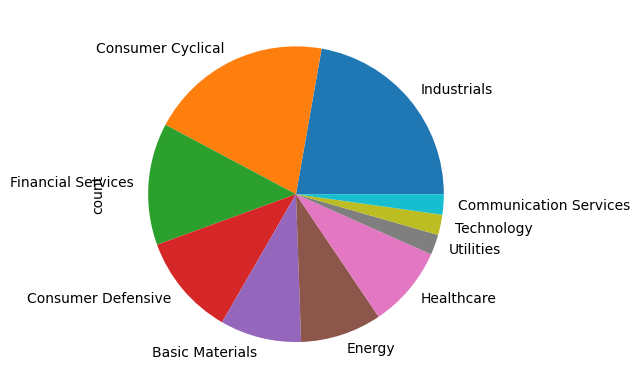

In [14]:
df['Sector'].value_counts().plot.pie()

KeyboardInterrupt: 

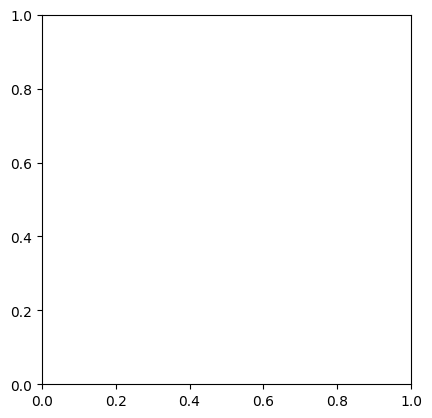

In [5]:
labels = []
size = []
for sector, count in sectors.items():
    labels.append(sector)
    size.append(size)


plt.pie(size, labels=labels)
plt.axis('equal')
plt.show()
    # df =df.sort_values(["Gain/Loss %"], ascending=False)